Load libraries

In [1]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots

Load the dataset

In [7]:
# Dataset from The Third International Knowledge Discovery and Data Mining Tools Competition. 
# Intrusion detection systems
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

df = pd.read_csv('~/datasets/processed_by_me/kddcup/01.with-header.csv')

How do data look like?

In [8]:
df.head(n=11)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


What is the type of each feature?

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

# Basic statistics

In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1st and 2nd order statistics

Assume $K = |\mathcal{D}^\text{train}| $.
Statistics of the $j$-th feature:

|<span> | | |
|---------------|-------|:--|
| Mean| $
    \bar{x}_j \triangleq $ | $    \frac{1}{K} \sum_{i=1}^K
        x_j^{(i)}
$ |
|Variance| $
    \text{Var}(x_j) \triangleq$  |    $\frac{1}{K-1} \sum_{i=1}^K
        \left( x_j^{(i)} - \bar{x}_j \right)^2
$|
|Standard deviation|$
\sigma_{x_j} \triangleq $ | $ \sqrt{\text{Var}(x_j)}
$|


Note: Why $K-1$? See [Wikipedia](https://en.wikipedia.org/wiki/Variance#Sample_variance).



## Boxplot

It represents minimum, percentiles (25%,50%,75%) and maximum.

KeyError: "['PacketsSent'] not in index"

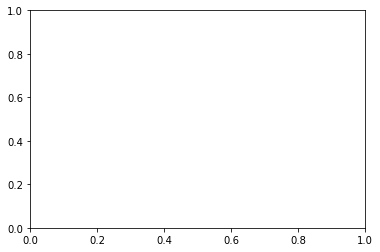

In [6]:
df.boxplot(column=['PacketsSent'])

#### Percentiles

How does are 25%, 50% (median) and 75% percentiles computed?

In [8]:
X = df['PacketsSent'].values
X

array([ 8,  7,  7, 12,  6,  6,  7,  6, 10, 24,  7, 14, 20, 23,  8, 33, 11,
        6, 19,  7, 58,  7, 14, 15, 20, 10, 33, 23, 15,  7, 18, 19,  7, 23,
        7, 10, 19,  8, 13,  7, 12, 17,  8, 33,  7, 37, 18, 12, 45,  7,  8,
       16,  7, 20, 26, 17, 23,  7,  7, 11, 22,  3, 14,  8, 80,  7,  6, 15,
       10, 16,  7,  9, 14, 17,  7,  7, 37,  9, 20,  9,  6, 20, 25, 11, 15,
       17,  7, 18, 11, 16, 13, 19,  9, 15, 21, 10, 28, 10, 20, 16,  7, 26,
       14,  7,  9, 20,  7, 16, 51, 20,  7, 22, 16,  7, 16, 19,  8, 58, 11,
       14, 24, 13, 19, 23,  8,  7, 29, 15, 41, 10, 38, 21,  7, 11, 16,  8,
       23,  8, 13, 15, 26,  9, 18,  7, 56, 18,  8, 18,  7,  3, 20,  8, 32,
       22, 15,  0, 22])

Order the values

In [9]:
X_sorted = np.sort(X)
X_sorted

array([ 0,  3,  3,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24,
       24, 25, 26, 26, 26, 28, 29, 32, 33, 33, 33, 37, 37, 38, 41, 45, 51,
       56, 58, 58, 80])

Visit the elements and stop when you visited 25% 

In [10]:
K = X_sorted.size
stop = K/100 * 25
print ('stop=',stop)
stop = math.ceil(stop)
print ('stop=',stop)
print('The 25% percentile is ', X_sorted[stop])

stop= 39.25
stop= 40
The 25% percentile is  8


**Meaning**: 25% of the values are $\le$ 8.

#### Outliers

First compute the Inter-Quartile range (range of the box):
    $$ \begin{align}
    \text{IQR} \triangleq 75p - 25p
    \end{align} $$
    

Upper __whisker__ : $\min(75p + 1.5 \cdot \text{IQR}, \max )$

Lower __whisker__ : $\max(25p - 1.5 \cdot \text{IQR}, \min )$

All points outside are considered **outliers**

## Histogram 

We can plot the histogram of all the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3efab743c8>,
      dtype=object)

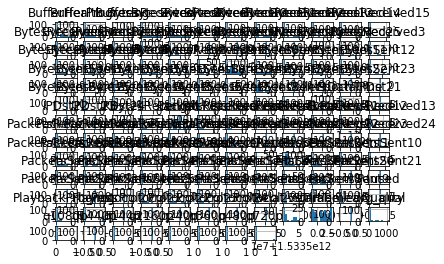

In [66]:
df.hist()

If features are too many, we need to select some

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ef6dea860>,
      dtype=object)

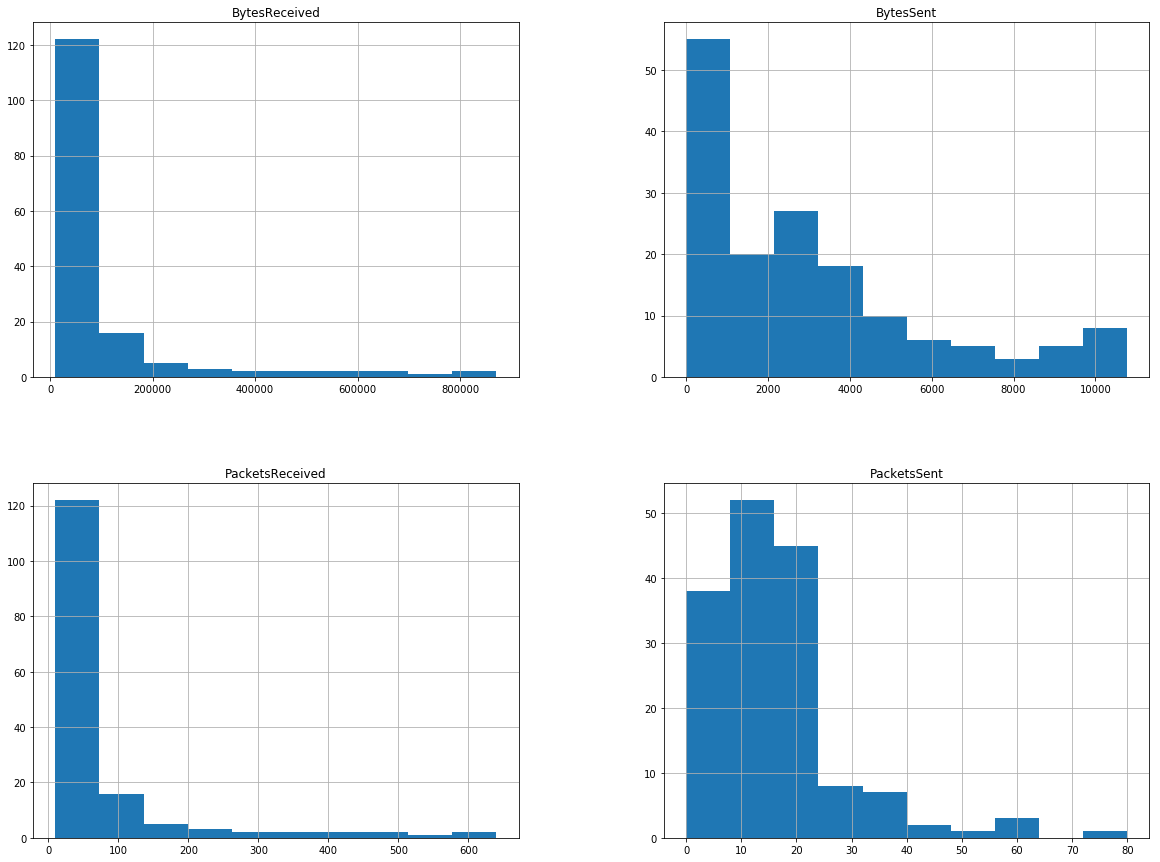

In [69]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(figsize=(20,15))

Each column counts the number of samples in the bin.

Histograms are discretized versions of probability density functions.

Binning is important

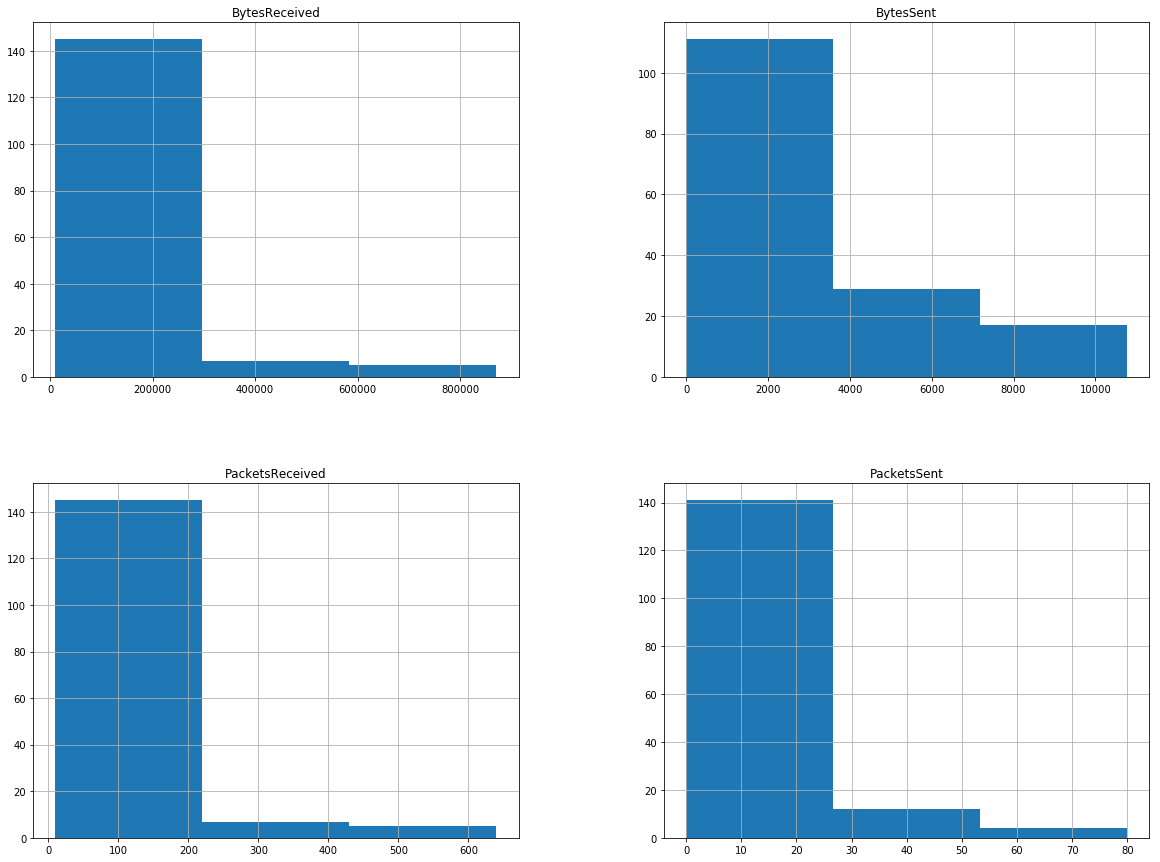

In [53]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(bins=3, figsize=(20,15))
plt.show()

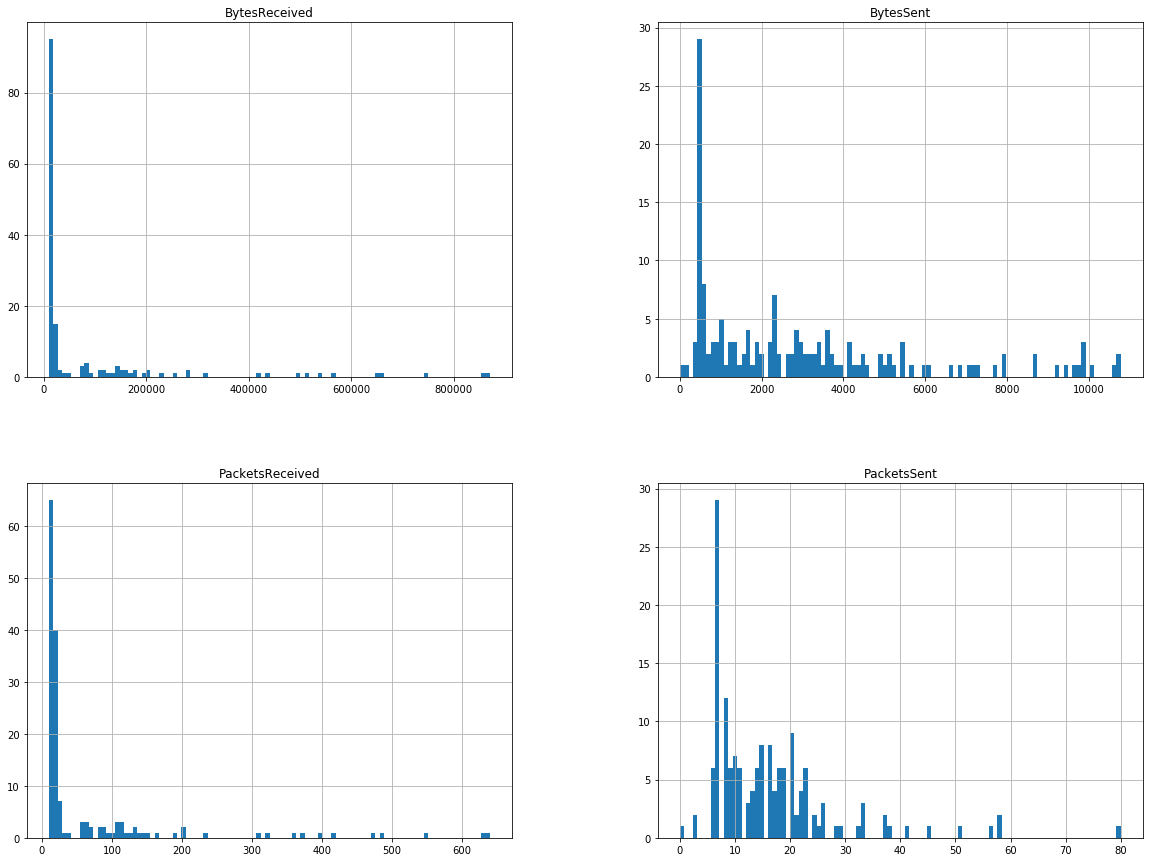

In [54]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(bins=100, figsize=(20,15))
plt.show()

How many bins?

If too few the density of the feature is badly approximated (note that with 3 bins we miss the 3 peaks).

If too many, each bin risk to have only 1 or few samples. 

**Rule of thumb**: the more samples, the more bins, since each bin collects a sufficient number of points. Trial and error.

We can observe how the feature distribution changes with different labels

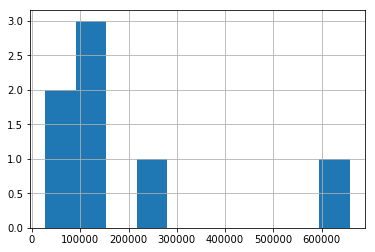

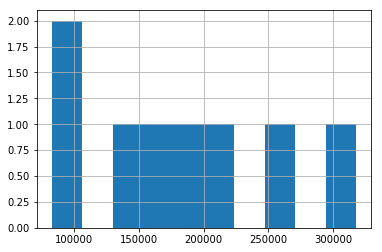

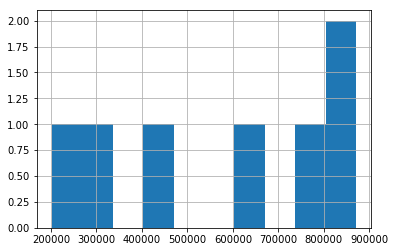

In [56]:
df_360p = df[ df['q360p']==1  ]
df_480p = df[ df['q480p']==1  ]
df_720p = df[ df['q720p']==1  ]

df_360p['BytesReceived'].hist()
plt.show()
df_480p['BytesReceived'].hist()
plt.show()
df_720p['BytesReceived'].hist()
plt.show()

It is easier to read them on one line

(array([1., 1., 0., 1., 0., 0., 1., 0., 1., 2.]),
 array([201903. , 268809.7, 335716.4, 402623.1, 469529.8, 536436.5,
        603343.2, 670249.9, 737156.6, 804063.3, 870970. ]),
 <a list of 10 Patch objects>)

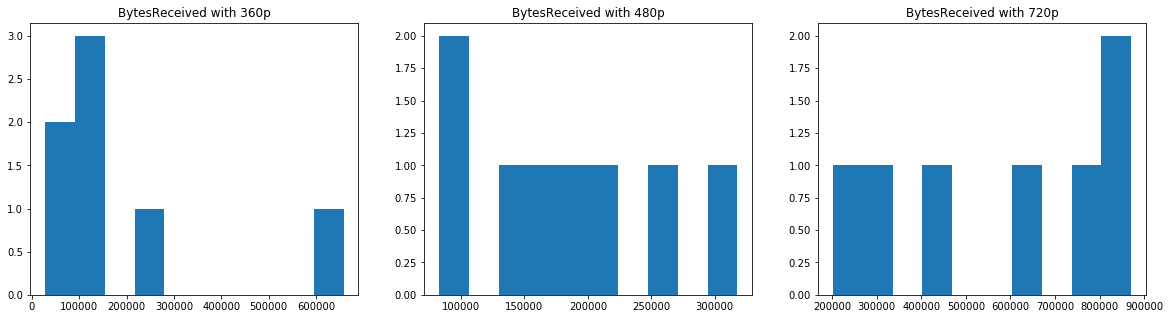

In [75]:
nrows = 1
ncols = 3
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(nrows, ncols, 1)
ax.set_title("BytesReceived with 360p")
ax.hist(df_360p['BytesReceived'])

ax = fig.add_subplot(nrows, ncols, 2)
ax.set_title("BytesReceived with 480p")
ax.hist(df_480p['BytesReceived'])

ax = fig.add_subplot(nrows, ncols, 3)
ax.set_title("BytesReceived with 720p")
ax.hist(df_720p['BytesReceived'])

# source: https://stackoverflow.com/a/37342028/2110769

**Be careful**: x-ranges are different: we cannot easily compare. Use ```range``` parameter.

(array([0., 0., 1., 1., 1., 0., 0., 1., 1., 2.]),
 array([     0.,  87097., 174194., 261291., 348388., 435485., 522582.,
        609679., 696776., 783873., 870970.]),
 <a list of 10 Patch objects>)

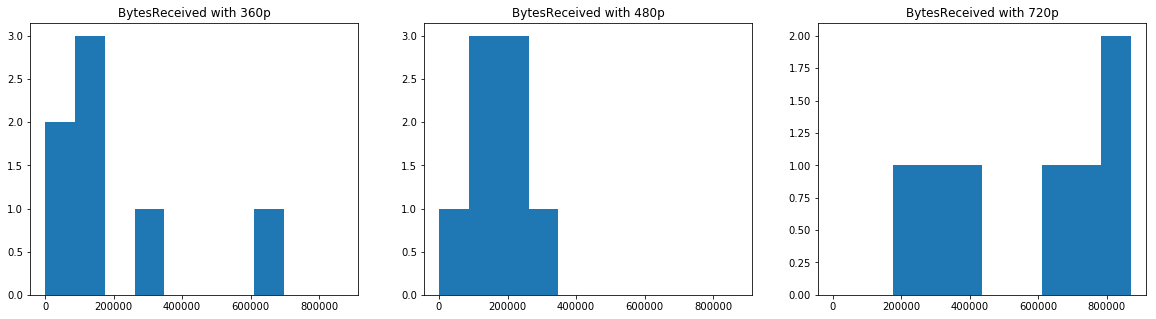

In [76]:
correct_range = [0, max(df['BytesReceived'])]

nrows = 1
ncols = 3
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(nrows, ncols, 1)
ax.set_title("BytesReceived with 360p")
ax.hist(df_360p['BytesReceived'], range=correct_range)

ax = fig.add_subplot(nrows, ncols, 2)
ax.set_title("BytesReceived with 480p")
ax.hist(df_480p['BytesReceived'], range=correct_range)

ax = fig.add_subplot(nrows, ncols, 3)
ax.set_title("BytesReceived with 720p")
ax.hist(df_720p['BytesReceived'], range=correct_range)

# source: https://stackoverflow.com/a/37342028/2110769

As expected, the higher the quality, the more ```ReceivedBytes``` concentrate toward higher values.

**Useful for classification**

We can build a simple classifier: ```if BytesReceived >= 800 ==> 720p```

It might be useful to check the distribution of different features

(array([0., 0., 2., 1., 3., 0., 1., 0., 0., 0.]),
 array([    0. ,  1077.8,  2155.6,  3233.4,  4311.2,  5389. ,  6466.8,
         7544.6,  8622.4,  9700.2, 10778. ]),
 <a list of 10 Patch objects>)

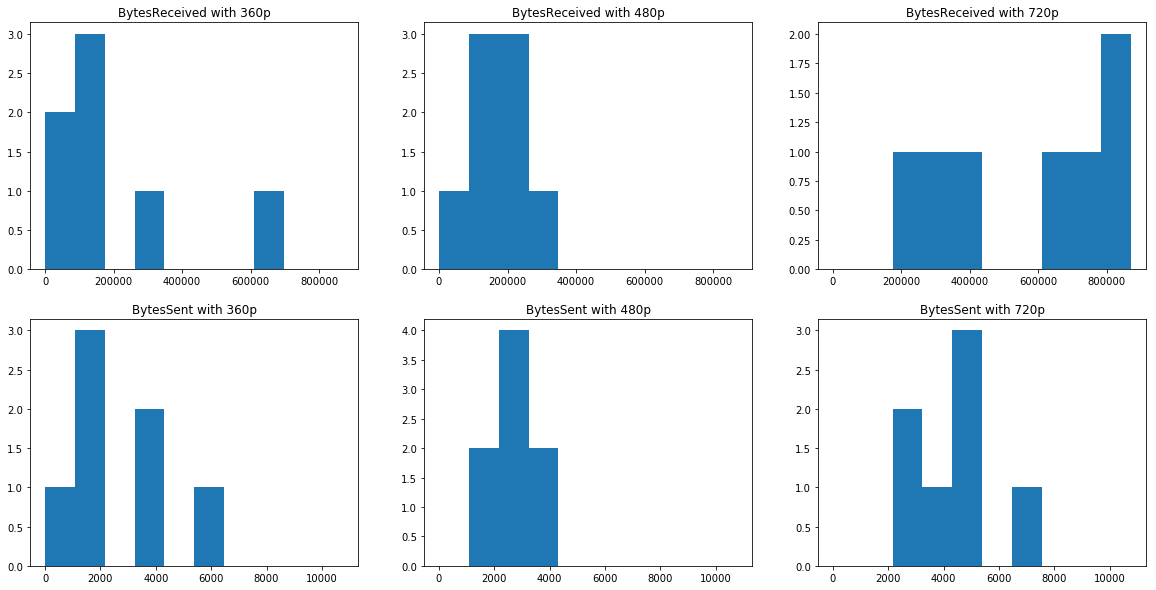

In [80]:
nrows = 2
ncols = 3
fig = plt.figure(figsize=(20, 10))

range_received = [0,max(df['BytesReceived']) ]

ax = fig.add_subplot(nrows, ncols, 1)
ax.set_title("BytesReceived with 360p")
ax.hist(df_360p['BytesReceived'], range=range_received)

ax = fig.add_subplot(nrows, ncols, 2)
ax.set_title("BytesReceived with 480p")
ax.hist(df_480p['BytesReceived'], range=range_received)

ax = fig.add_subplot(nrows, ncols, 3)
ax.set_title("BytesReceived with 720p")
ax.hist(df_720p['BytesReceived'], range=range_received)

range_sent = [0,max(df['BytesSent'])]

ax = fig.add_subplot(nrows, ncols, 4)
ax.set_title("BytesSent with 360p")
ax.hist(df_360p['BytesSent'], range=range_sent)

ax = fig.add_subplot(nrows, ncols, 5)
ax.set_title("BytesSent with 480p")
ax.hist(df_480p['BytesSent'], range=range_sent)

ax = fig.add_subplot(nrows, ncols, 6)
ax.set_title("BytesSent with 720p")
ax.hist(df_720p['BytesSent'], range=range_sent)

# source: https://stackoverflow.com/a/37342028/2110769